In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from scipy.stats import boxcox

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
def forecasting(df,col_name,days_to_forecast,table,graph,State_name="all"):
    df_out=pd.DataFrame(columns=["ds","y"]) 
    
    if State_name=="all":
        
        df_out=pd.DataFrame((df.groupby('Date')[col_name].sum()))
        df_out.reset_index(inplace=True)
        df_out.rename(columns={'Date':'ds',col_name:'y'},inplace=True)
    else:
        df_State=df[df['State']==State_name]
        df_out.ds=df_State['Date']
        df_out.y=df_State[col_name]
        
    print(df_out)
        
    model=Prophet(daily_seasonality=True,yearly_seasonality=False)
    model.fit(df_out)
    future = model.make_future_dataframe(periods=days_to_forecast)
    forecast=model.predict(future)
    if table=="Yes":
        print("Forecasted Table for number of "+col_name+" for State: "+State_name+"\n")
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(days_to_forecast))
    if graph=="Yes":
        print("\nGraph for number of "+col_name+" for State: "+State_name)
        model.plot(forecast)

            ds        y
0   2020-01-30        0
1   2020-01-31        0
2   2020-02-01        0
3   2020-02-02        0
4   2020-02-03        0
5   2020-02-04        0
6   2020-02-05        0
7   2020-02-06        0
8   2020-02-07        0
9   2020-02-08        0
10  2020-02-09        0
11  2020-02-10        0
12  2020-02-11        0
13  2020-02-12        0
14  2020-02-13        0
15  2020-02-14        0
16  2020-02-15        0
17  2020-02-16        0
18  2020-02-17        0
19  2020-02-18        0
20  2020-02-19        0
21  2020-02-20        0
22  2020-02-21        0
23  2020-02-22        0
24  2020-02-23        0
25  2020-02-24        0
26  2020-02-25        0
27  2020-02-26        0
28  2020-02-27        0
29  2020-02-28        0
30  2020-02-29        0
31  2020-03-01        0
32  2020-03-02        0
33  2020-03-03        3
34  2020-03-04        3
35  2020-03-05        3
36  2020-03-06        3
37  2020-03-07        3
38  2020-03-08        3
39  2020-03-09        3
40  2020-03-10  

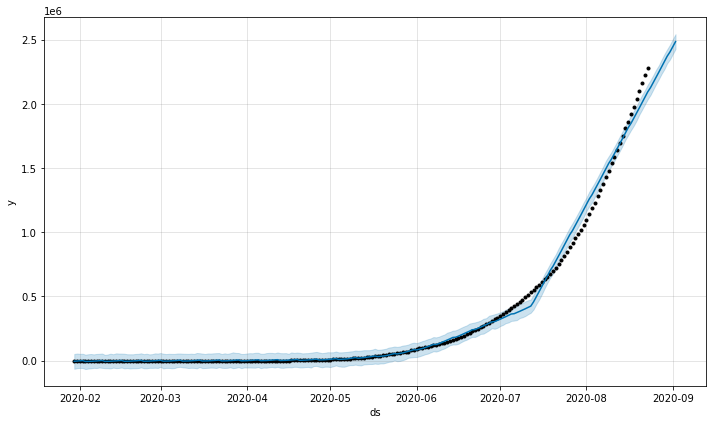

In [165]:
df=pd.read_csv("prophet_covid.csv")
df.Date=pd.to_datetime(df.Date,infer_datetime_format=True)
State_name="Kerala"
col_name="Cured"
days_to_forecast=10
table="Yes"
graph="Yes"
forecasting(df,col_name,days_to_forecast,table,graph)
